In [226]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
df = pd.read_csv("Initial_cleaned_data.csv")

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40365 entries, 0 to 40364
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      40365 non-null  object 
 1   Symbol    40365 non-null  object 
 2   LTP       40365 non-null  float64
 3   %Change   40365 non-null  float64
 4   High      40365 non-null  float64
 5   Low       40365 non-null  float64
 6   Open      40365 non-null  float64
 7   Quantity  40348 non-null  float64
 8   Turnover  40365 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.8+ MB


In [229]:
df['Date'] = pd.to_datetime(df['Date'])

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40365 entries, 0 to 40364
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      40365 non-null  datetime64[ns]
 1   Symbol    40365 non-null  object        
 2   LTP       40365 non-null  float64       
 3   %Change   40365 non-null  float64       
 4   High      40365 non-null  float64       
 5   Low       40365 non-null  float64       
 6   Open      40365 non-null  float64       
 7   Quantity  40348 non-null  float64       
 8   Turnover  40365 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.8+ MB


In [231]:
stock = 'EBL'
start_date  ='2019-01-01'
end_date = '2019-01-30'

In [232]:
req_stock_df= df[(df['Date'] > start_date ) & (df['Date'] < end_date ) & (df['Symbol']==stock )]

In [233]:
req_stock_df = req_stock_df.sort_values('Date')

In [234]:
fig = px.line(req_stock_df, x = 'Date',y = 'LTP', title = f'LTP of the given dates of {stock}')
fig.update_layout(
    width=1000,  
    height=400
)

fig.show()

In [235]:
req_stock_df['PP'] = pd.Series((req_stock_df['High']+req_stock_df['Low']+req_stock_df['LTP'])/3).round(2)

In [236]:
req_stock_df['R1'] = pd.Series(2* req_stock_df['PP']-req_stock_df['Low']).round(2)
req_stock_df['S1'] = pd.Series(2* req_stock_df['PP']-req_stock_df['High']).round(2)
req_stock_df['R2'] = pd.Series((req_stock_df['PP']+req_stock_df['High']-req_stock_df['Low']))
req_stock_df['S2'] = pd.Series((req_stock_df['PP']-req_stock_df['High']+req_stock_df['Low']))

In [237]:
req_stock_df

,Date,Symbol,LTP,%Change,High,Low,Open,Quantity,Turnover,PP,R1,S1,R2,S2
1130,2019-01-02,EBL,542.0,0.74,548.0,538.0,538.0,4507.0,2458296.0,542.67,547.34,537.34,552.67,532.67
2538,2019-01-03,EBL,535.0,-1.29,545.0,535.0,542.0,2919.0,1569058.0,538.33,541.66,531.66,548.33,528.33
3024,2019-01-06,EBL,532.0,-0.56,540.0,530.0,535.0,6675.0,3556369.0,534.00,538.00,528.00,544.00,524.00
3174,2019-01-07,EBL,532.0,0.00,540.0,528.0,532.0,9134.0,4860065.0,533.33,538.66,526.66,545.33,521.33
3320,2019-01-08,EBL,531.0,-0.19,534.0,530.0,532.0,11066.0,5879327.0,531.67,533.34,529.34,535.67,527.67
3478,2019-01-09,EBL,532.0,0.19,535.0,531.0,531.0,8224.0,4373158.0,532.67,534.34,530.34,536.67,528.67
177,2019-01-10,EBL,536.0,0.75,537.0,532.0,532.0,5665.0,3031050.0,535.00,538.00,533.00,540.00,530.00
335,2019-01-13,EBL,531.0,-0.93,536.0,531.0,536.0,6412.0,3413832.0,532.67,534.34,529.34,537.67,527.67
492,2019-01-14,EBL,534.0,0.56,535.0,531.0,531.0,5086.0,53400.0,533.33,535.66,531.66,537.33,529.33
648,2019-01-15,EBL,534.0,0.00,541.0,533.0,534.0,7057.0,3776389.0,536.00,539.00,531.00,544.00,528.00


Text(0, 0.5, 'Price')

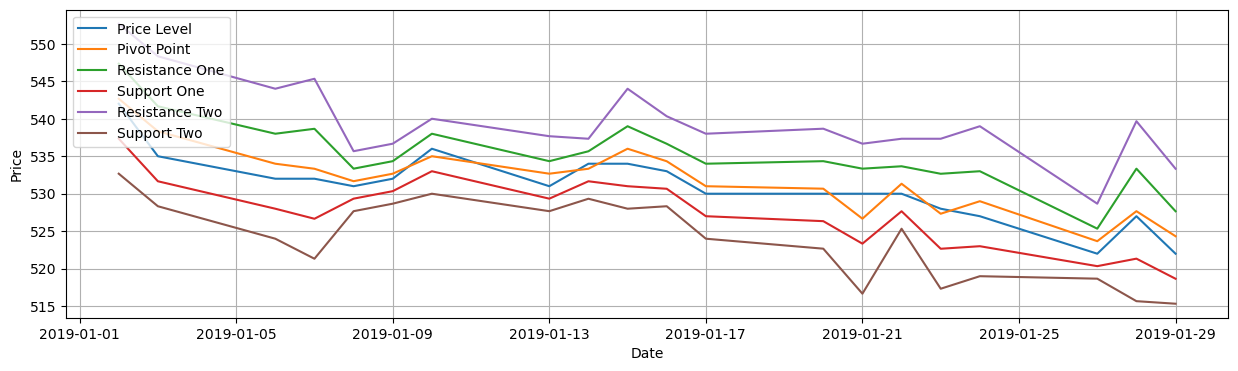

In [238]:
import matplotlib.dates as mdates
#from mplfinance import candlestick_ohlc

#req_stock_df["Date"] = req_stock_df["Date"].apply(mdates.date2num)
#ohlc= req_stock_df[['Date', 'LTP', 'High', 'Low','Open']].copy()
            
f1, ax = plt.subplots(figsize = (15,4))
#candlestick_ohlc(ax, ohlc.values, width=.5, colorup='#db3f3f', colordown='#77d879')
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(req_stock_df['Date'], req_stock_df['LTP'], label = 'Price Level')
plt.plot(req_stock_df['Date'], req_stock_df['PP'], label = 'Pivot Point')
plt.plot(req_stock_df['Date'], req_stock_df['R1'], label = 'Resistance One')
plt.plot(req_stock_df['Date'], req_stock_df['S1'], label = 'Support One')
plt.plot(req_stock_df['Date'], req_stock_df['R2'], label = 'Resistance Two')
plt.plot(req_stock_df['Date'], req_stock_df['S2'], label = 'Support Two')
plt.legend(loc=2, prop={'size': 10})
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')

In [239]:
import plotly.subplots as sp
import plotly.graph_objects as go

fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.2)

# Add candlestick chart
fig.add_trace(go.Candlestick(
    x=req_stock_df['Date'],
    open=req_stock_df['Open'],
    high=req_stock_df['High'],
    low=req_stock_df['Low'],
    close=req_stock_df['LTP'],
    increasing_line_color='#db3f3f',
    decreasing_line_color='#77d879',
    name='Candlestick'
), row=1, col=1)

# Add line plots
line_plots = ['LTP', 'PP', 'R1', 'S1', 'R2', 'S2']
for i, col in enumerate(line_plots):
    fig.add_trace(go.Scatter(
        x=req_stock_df['Date'],
        y=req_stock_df[col],
        mode='lines',
        name=col
    ), row=2, col=1)

# Update layout
fig.update_layout(
    title='Stock Price Analysis',
    xaxis=dict(title='Date', type='date', tickformat='%Y-%m-%d'),
    yaxis=dict(title='LTP'),
    legend=dict(x=1, y=1, traceorder='normal', font=dict(size=10), bgcolor='rgba(0,0,0,0)'),
    autosize=False,
    width=900,
    height=600
)

# Display the plot
fig.show()

In [240]:
fig1 = px.scatter(req_stock_df, x='Date', y=['LTP', 'PP', 'R1', 'S1', 'R2', 'S2'],render_mode='line_plots')
fig1.add_trace(go.Candlestick(
    x=req_stock_df['Date'],
    open=req_stock_df['Open'],
    high=req_stock_df['High'],
    low=req_stock_df['Low'],
    close=req_stock_df['LTP'],
    increasing_line_color='#db3f3f',
    decreasing_line_color='#77d879',
    name='Candlestick',
))
fig1.update_layout(
    title='Stock Price Analysis',
    xaxis=dict(title='Date', type='date', tickformat='%Y-%m-%d'),
    yaxis=dict(title='Price'),
    legend=dict(x=0, y=1, traceorder='normal', font=dict(size=10), bgcolor='rgba(0,0,0,0)'),
    autosize=False,
    width=900,
    height=400
)
fig1.show()